# Simple Linear Regression

## Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [3]:
%cd "drive/MyDrive/Projects/Machine-Learning-A-Z/Regression/Support Vector Regression"

/content/drive/Othercomputers/Predator/Projects/Machine-Learning-A-Z/Regression/Support Vector Regression


In [4]:
!ls

Position_Salaries.csv  support_vector_regression.ipynb


In [33]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Define input and output variables

In [34]:
X = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset.iloc[:,-1].values.reshape(-1,1)

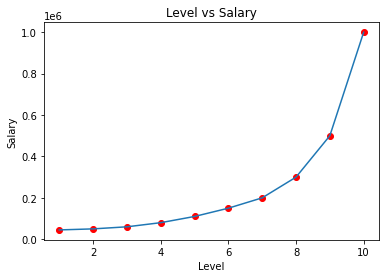

In [35]:
plt.scatter(X,y, color='red')
plt.plot(X,y)
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY = StandardScaler()
X_scaled = scX.fit_transform(X)
y_scaled = scY.fit_transform(y)

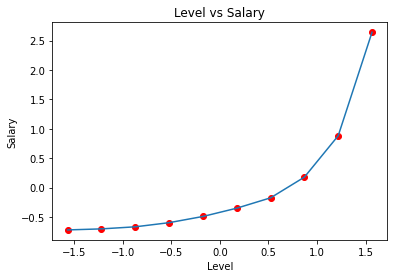

In [37]:
plt.scatter(X_scaled,y_scaled, color='red')
plt.plot(X_scaled,y_scaled)
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Training Simple Linear Regression Model

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled,y_scaled)
y_pred_scaled = regressor.predict(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


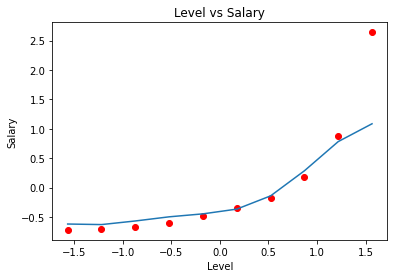

In [39]:
plt.scatter(X_scaled,y_scaled, color='red')
plt.plot(X_scaled,y_pred_scaled)
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Reversing the feature scaling

In [40]:
y_pred = scY.inverse_transform(y_pred_scaled.reshape((-1,1)))

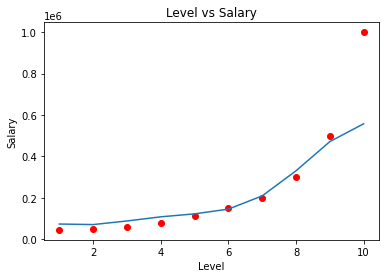

In [41]:
plt.scatter(X,y, color='red')
plt.plot(X,y_pred)
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

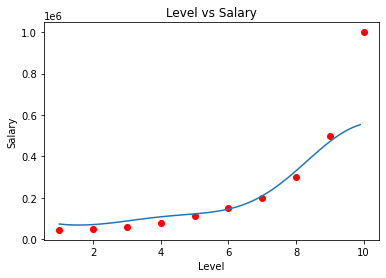

In [57]:
X_grid = np.arange(min(X.reshape(-1)),max(X.reshape(-1)), 0.1).reshape((-1,1))
y_grid = scY.inverse_transform(regressor.predict(scX.transform(X_grid)).reshape((-1, 1)))
plt.scatter(X,y, color='red')
plt.plot(X_grid,y_grid)
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()